In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

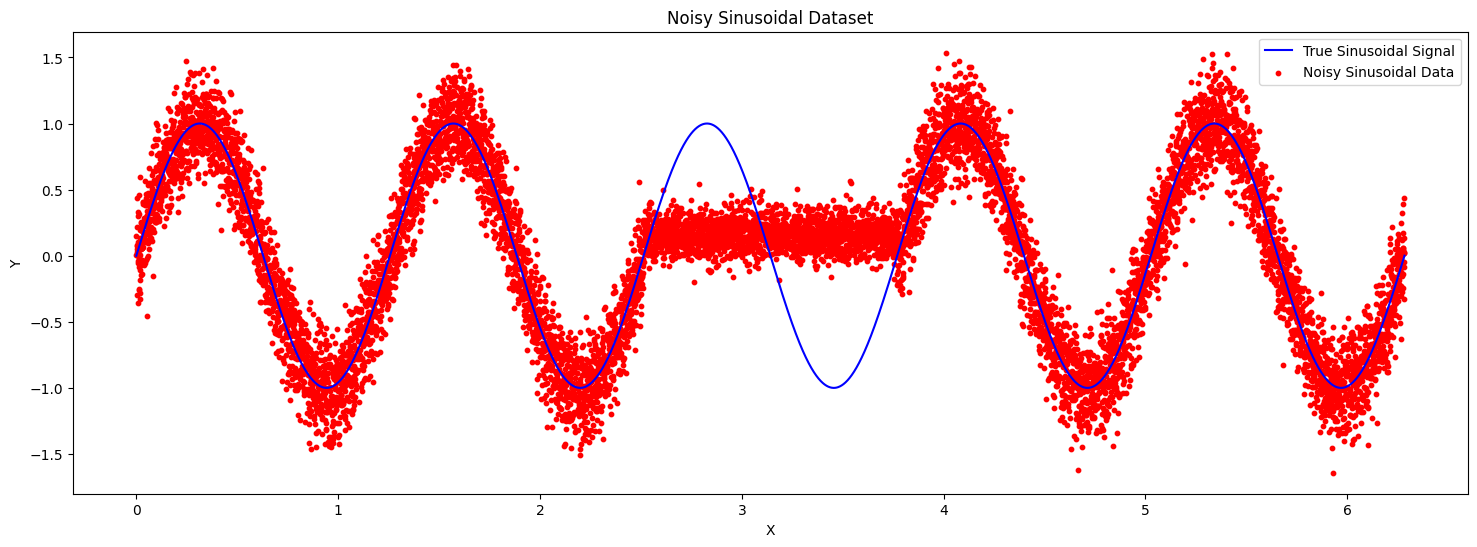

In [3]:
from data_selector.data.create_test_dataset import generate_noisy_sinusoidal, flatten_signal

# Example usage
num_samples = 10000
frequency = 5
noise_level = 0.2  # Adjust the noise level here

x, y_noisy = generate_noisy_sinusoidal(num_samples, frequency, noise_level)
y_flattened = flatten_signal(y_noisy, int(2/5*len(y_noisy)), int(3/5*len(y_noisy)))  # Adjust the start and end indices here

# Plotting the dataset
plt.figure(figsize=(18, 6))
plt.plot(x, np.sin(frequency * x), label='True Sinusoidal Signal', color='blue')
plt.scatter(x, y_flattened, label='Noisy Sinusoidal Data', color='red', s=10)
plt.title('Noisy Sinusoidal Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [4]:
df = pd.DataFrame({'x': x, 'y': y_flattened, 'z':np.sin(frequency * x)})

In [5]:
from data_selector.lasso_data_selector import LassoDataSelector

# Example usage:
# Assuming 'df' is your DataFrame
selector = LassoDataSelector(df, fig_size=(1200,600), marker_size=2)
display(selector.select_data())

# selectore.selected_data contains the currently selected data
# selector.confirmed_data contains the last confirmed data (i.e. the data that was selected when the user last clicked 'Confirm Selection')
# selector.all_confirmed_data contains all the confirmed data as a dictionnary of dataframes (i.e. the data that was selected every time the user clicked 'Confirm Selection')

In [6]:
selector.selected_data

""


In [7]:
selector.confirmed_data

""


In [8]:
selector.all_confirmed_data

{}

In [9]:
#transform all selected data into one dataframe
selected_data = pd.concat([selector.all_confirmed_data[i] for i in list(selector.all_confirmed_data.keys())]).set_index('timestamp')
selected_data

ValueError: No objects to concatenate